3 Вариант

У нас уравнение имеет вид:
$$y''(t) + 3y'(t) + 2y(t) = 3u'(t)+u(t)$$

In [1]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

In [2]:
# Шаг 1: Определение системы по дифференциальному уравнению
# y'' + 3y' + 2y = 3u' + u
num = [3, 1]       # числитель [коэффициент при u', коэффициент при u]
den = [1, 3, 2]    # знаменатель [коэффициент при y'', y', y]

# Передаточная функция
G = ctrl.TransferFunction(num, den)
print("Передаточная функция G(s) =")
print(G)

Передаточная функция G(s) =

   3 s + 1
-------------
s^2 + 3 s + 2



In [3]:
# Переход к пространственной модели
sys1= ctrl.tf2ss(num, den)
A = sys1.A
B = sys1.B
C = sys1.C
D = sys1.D
print("\nМатрицы пространственной модели (A, B, C, D):")
print("A =\n", A)
print("B =\n", B)
print("C =\n", C)
print("D =\n", D)


Матрицы пространственной модели (A, B, C, D):
A =
 [[-3. -2.]
 [ 1.  0.]]
B =
 [[1.]
 [0.]]
C =
 [[3. 1.]]
D =
 [[0.]]


In [4]:
# Оценка устойчивости: собственные числа матрицы A
eigs = np.linalg.eigvals(A)
print("\nСобственные числа матрицы A (полюса):", eigs)


Собственные числа матрицы A (полюса): [-2. -1.]


In [5]:
# Управляемость и наблюдаемость
Co = ctrl.ctrb(A, B)
Ob = ctrl.obsv(A, C)
print("\nРанг матрицы управляемости:", np.linalg.matrix_rank(Co))
print("Ранг матрицы наблюдаемости:", np.linalg.matrix_rank(Ob))


Ранг матрицы управляемости: 2
Ранг матрицы наблюдаемости: 2


Text(0, 0.5, 'y(t)')

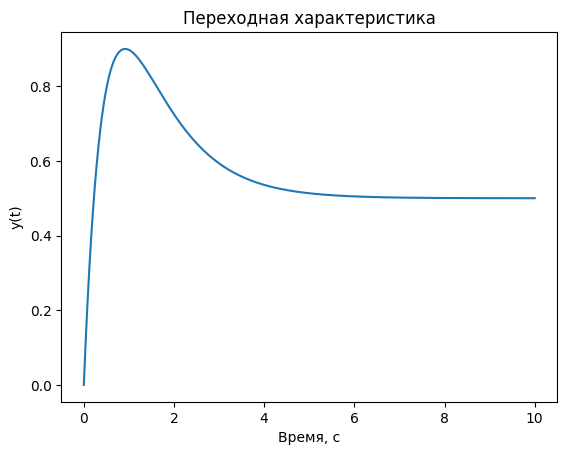

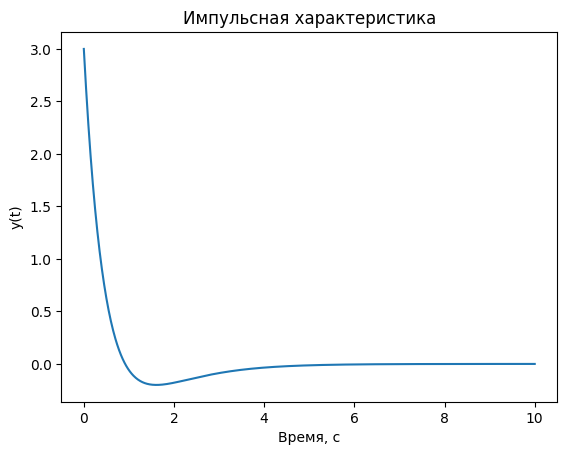

In [6]:
# Шаг 2: Переходная и импульсная характеристики
t = np.linspace(0, 10, 1000)
t_step, y_step = ctrl.step_response(G, T=t)
t_imp, y_imp = ctrl.impulse_response(G, T=t)

plt.figure()
plt.plot(t_step, y_step)
plt.title("Переходная характеристика")
plt.xlabel("Время, с")
plt.ylabel("y(t)")

plt.figure()
plt.plot(t_imp, y_imp)
plt.title("Импульсная характеристика")
plt.xlabel("Время, с")
plt.ylabel("y(t)")

Text(0, 0.5, 'x2')

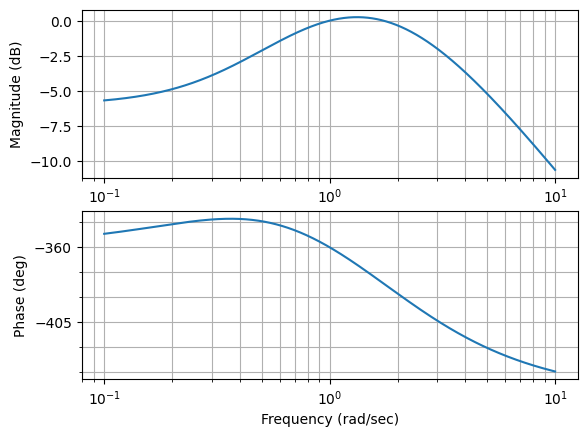

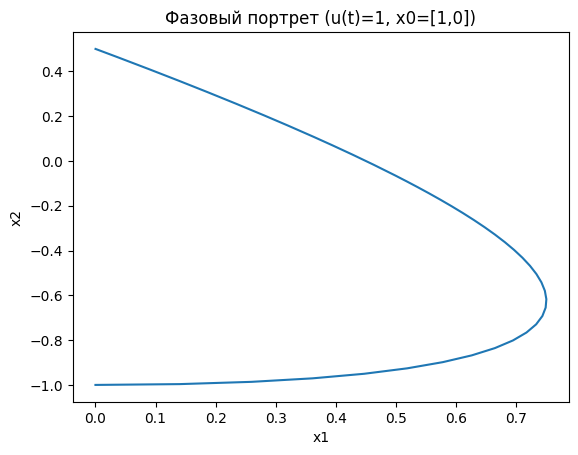

In [12]:
# АЧХ и ФЧХ
mag, phase, omega = ctrl.bode(G, dB=True, plot=True)

# Фазовый портрет (u(t)=1, начальное состояние x0=[1,0])
x0 = [0, -1]
t_phi = np.linspace(0, 10, 200)
forced_response = ctrl.forced_response(ctrl.ss(A, B, C, D), T=t_phi, U=np.ones_like(t_phi), X0=x0)
t_out, y_out, x_out = forced_response.t, forced_response.y, forced_response.x
plt.figure()
plt.plot(x_out[0], x_out[1])
plt.title("Фазовый портрет (u(t)=1, x0=[1,0])")
plt.xlabel("x1")
plt.ylabel("x2")


In [8]:
# Шаг 3: Дискретизация системы (T = 0.1 c)
T = 0.1
Gd = ctrl.sample_system(G, T)
sysd = ctrl.tf2ss(Gd.num[0][0], Gd.den[0][0])
Ad, Bd, Cd, Dd = sysd.A, sysd.B, sysd.C, sysd.D
print("\nДискретные матрицы пространственной модели (T=0.1):")
print("Ad =\n", Ad)
print("Bd =\n", Bd)
print("Cd =\n", Cd)
print("Dd =\n", Dd)


Дискретные матрицы пространственной модели (T=0.1):
Ad =
 [[ 1.72356817 -0.74081822]
 [ 1.          0.        ]]
Bd =
 [[1.]
 [0.]]
Cd =
 [[ 0.26284795 -0.25422293]]
Dd =
 [[0.]]


In [9]:
# Оценка устойчивости дискретной системы: собственные числа Ad
eigs_d = np.linalg.eigvals(Ad)
print("\nСобственные числа матрицы Ad (дискретные полюса):", eigs_d)


Собственные числа матрицы Ad (дискретные полюса): [0.90483742 0.81873075]


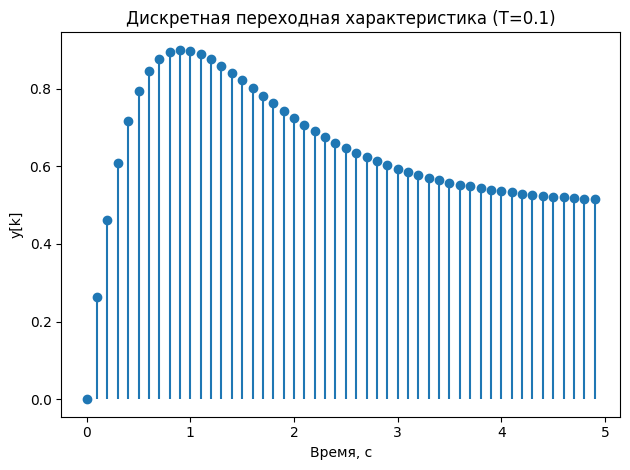

In [10]:
# Шаг 4: Дискретный переходный процесс
t_d = np.arange(0, 50) * T
t_step_d, y_step_d = ctrl.step_response(Gd, T=t_d)

plt.figure()
plt.stem(t_step_d, y_step_d, basefmt=" ")
plt.title("Дискретная переходная характеристика (T=0.1)")
plt.xlabel("Время, с")
plt.ylabel("y[k]")

plt.tight_layout()
plt.show()